# May 8th, 2022 (x-valid, binary vs sample)

**Motivation**: XV just doesn't work.  End of the story. <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from numpy.ma import masked_where as mwh
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
_fig_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = 'Documents/workspaces/lfr/binary_overlapping'
lfr_dir = pjoin(os.environ['HOME'], lfr_dir)

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# set style & no interpolalation
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## 128 * 3

In [2]:
mice = Mice(Config(128, 3))
mice.setup_func_data('rest', runs_only=True)

### p25-sample

In [3]:
%%time

perc = 'p25-sample'
max_iter = 50
dlist = []
for mode, proc in zip(['ca2', 'bold-lite'], [mice.ca, mice.bold]):
    for num_k in [7, 11, 15, 20]:
        for key in proc:
            sv = SVINET(mice, num_k, perc, key, mode, verbose=False)
            _ = sv.load_runs()
            data = collections.defaultdict(list)
            for run_name, run_dict in sv._runs[sv.perc].items():
                if len(run_dict['community_sv']) != num_k:
                    continue
                for lbl, vals in run_dict['valid'].items():
                    if 'nll' not in lbl:
                        continue
                    num = min(max_iter, len(vals))
                    x = np_nans((1, max_iter))
                    x[0][-num:] = np.array(vals)[-num:]
                    data[lbl].append(x)
            data = {
                lbl: bn.nanmean(np.concatenate(x), 0)
                for lbl, x in data.items()
            } 
            for lbl, vals in data.items():
                dlist.append({
                    'mode': [mode] * max_iter,
                    'k': [num_k] * max_iter,
                    'key': [key] * max_iter,
                    'iter': range(-max_iter + 1, 1),
                    'label': [lbl] * max_iter,
                    'score': vals,
                })
df = pd.DataFrame(merge_dicts(dlist))
df_0 = df.loc[df['iter'] == 0].drop(columns=['iter'])

CPU times: user 20min 16s, sys: 1min 20s, total: 21min 36s
Wall time: 27min 38s


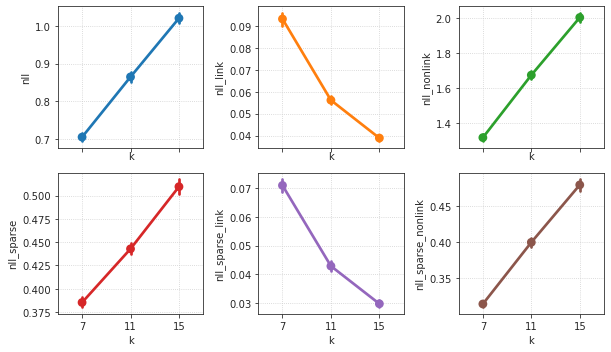

In [4]:
fig, axes = create_figure(2, 3, (8.5, 5), 'all')
for i, (ax, lbl) in enumerate(zip(axes.ravel(), df_0['label'].unique())):
    _df = df_0.loc[df_0['label'] == lbl]
    sns.pointplot(
        data=_df,
        x='k',
        y='score',
        color=f"C{i}",
        lw=3,
        ax=ax,
    )
    ax.set_ylabel(lbl)
    ax.grid()

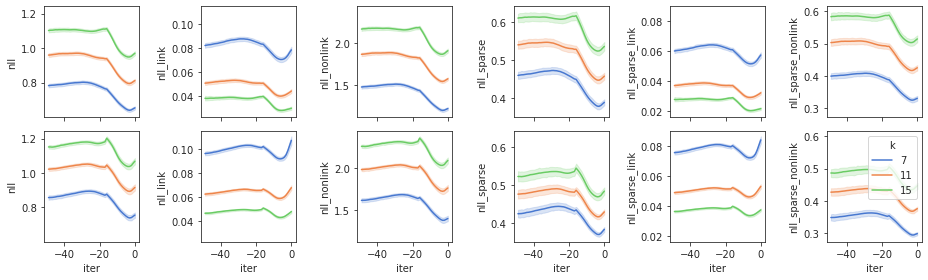

In [6]:
fig, axes = create_figure(2, 6, (13.5, 3.7), 'all', 'col')

for i, mode in enumerate(df['mode'].unique()):
    for j, lbl in enumerate(df['label'].unique()):
        _df = df.loc[
            (df['mode'] == mode) &
            (df['label'] == lbl)
        ]
        sns.lineplot(
            data=_df,
            x='iter',
            y='score',
            hue='k',
            palette='muted',
            ax=axes[i, j],
            legend=True if (i, j) == (1, 5) else False,
        )
        axes[i, j].set_ylabel(lbl)

### p25-binary

In [7]:
%%time

perc = 'p25-binary'
max_iter = 50
dlist = []
for mode, proc in zip(['ca2', 'bold-lite'], [mice.ca, mice.bold]):
    for num_k in [7, 11, 15, 20]:
        for key in proc:
            sv = SVINET(mice, num_k, perc, key, mode, verbose=False)
            _ = sv.load_runs()
            data = collections.defaultdict(list)
            for run_name, run_dict in sv._runs[sv.perc].items():
                if len(run_dict['community_sv']) != num_k:
                    continue
                for lbl, vals in run_dict['valid'].items():
                    if 'nll' not in lbl:
                        continue
                    num = min(max_iter, len(vals))
                    x = np_nans((1, max_iter))
                    x[0][-num:] = np.array(vals)[-num:]
                    data[lbl].append(x)
            data = {
                lbl: bn.nanmean(np.concatenate(x), 0)
                for lbl, x in data.items()
            } 
            for lbl, vals in data.items():
                dlist.append({
                    'mode': [mode] * max_iter,
                    'k': [num_k] * max_iter,
                    'key': [key] * max_iter,
                    'iter': range(-max_iter + 1, 1),
                    'label': [lbl] * max_iter,
                    'score': vals,
                })
df = pd.DataFrame(merge_dicts(dlist))
df_0 = df.loc[df['iter'] == 0].drop(columns=['iter'])

CPU times: user 29min 43s, sys: 1min 55s, total: 31min 39s
Wall time: 40min 7s


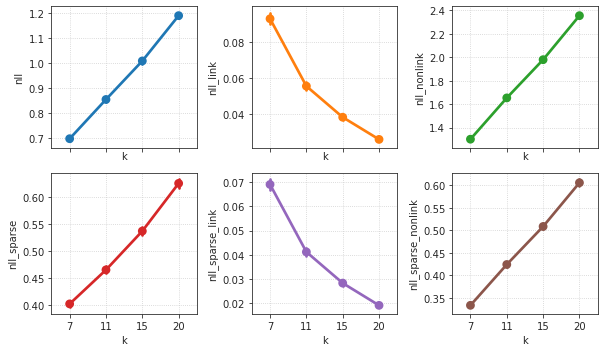

In [8]:
fig, axes = create_figure(2, 3, (8.5, 5), 'all')
for i, (ax, lbl) in enumerate(zip(axes.ravel(), df_0['label'].unique())):
    _df = df_0.loc[df_0['label'] == lbl]
    sns.pointplot(
        data=_df,
        x='k',
        y='score',
        color=f"C{i}",
        lw=3,
        ax=ax,
    )
    ax.set_ylabel(lbl)
    ax.grid()

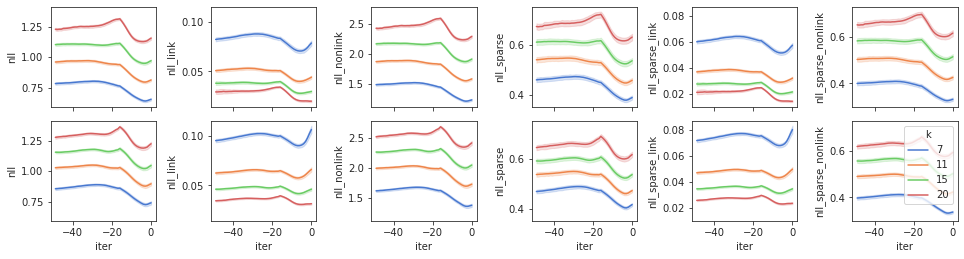

In [9]:
fig, axes = create_figure(2, 6, (13.5, 3.7), 'all', 'col')

for i, mode in enumerate(df['mode'].unique()):
    for j, lbl in enumerate(df['label'].unique()):
        _df = df.loc[
            (df['mode'] == mode) &
            (df['label'] == lbl)
        ]
        sns.lineplot(
            data=_df,
            x='iter',
            y='score',
            hue='k',
            palette='muted',
            ax=axes[i, j],
            legend=True if (i, j) == (1, 5) else False,
        )
        axes[i, j].set_ylabel(lbl)

## E.g.

In [2]:
mice = Mice(Config(128, 3))
mice.setup_func_data('rest')

num_k = 5
perc = 'p24-sample'

In [3]:
key = 'sub-SLC10_ses-3_run-1'
mode = 'ca2'
gr = Group(mice, num_k, mode=mode)
sv = SVINET(mice, num_k, perc, key, mode)
self = sv

current expt: 'p24-sample'

In [4]:
_ = sv.load_runs()

[PROGRESS] experiment loaded: 'k = 5, p24-sample',  total # runs:  493

[PROGRESS] some runs were excluded:     7 x k = 4

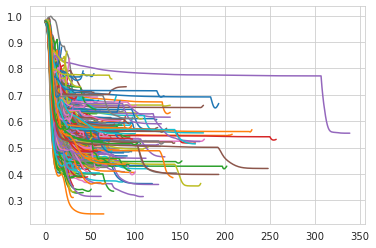

In [5]:
for run_name, run_dict in sv._runs[sv.perc].items():
    plt.plot(run_dict['valid']['nll'])

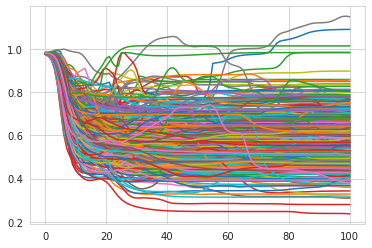

In [ ]:
_ = sv.fit_svinet()

In [7]:
tr = sv.project_vec()
tr = sv.trim2d(tr)

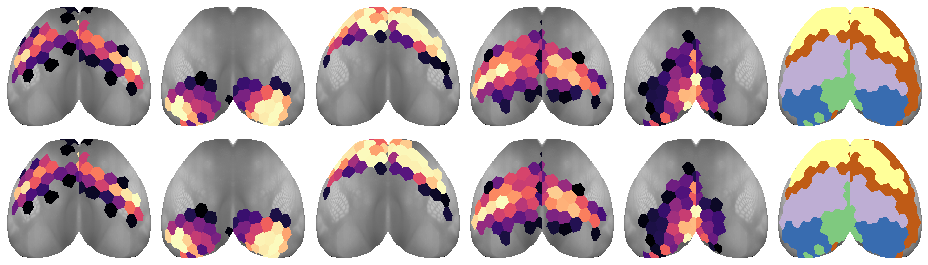

In [10]:
quick_show(tr, tr)

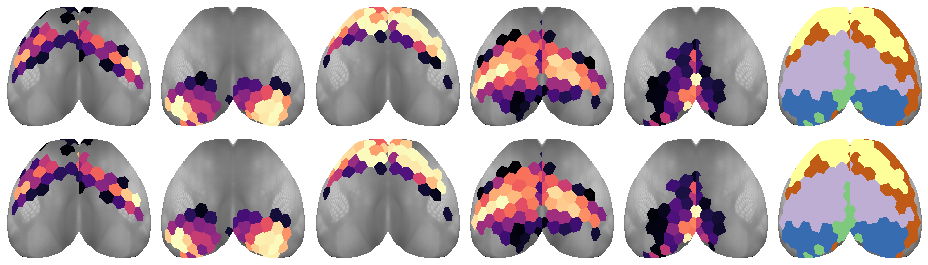

In [6]:
dlist = []
for run_name, run_dict in sv._runs[sv.perc].items():
    stuff = {k: v for k, v in run_dict['valid'].items() if 'nll' in k}
    num_iter = np.unique([len(v) for v in stuff.values()]).item()
    for k, v in stuff.items():
        dlist.append({
            'score': v,
            'label': [k] * num_iter,
            'iter': range(num_iter),
            'run_name': [run_name] * num_iter,
        })
df = pd.DataFrame(merge_dicts(dlist))

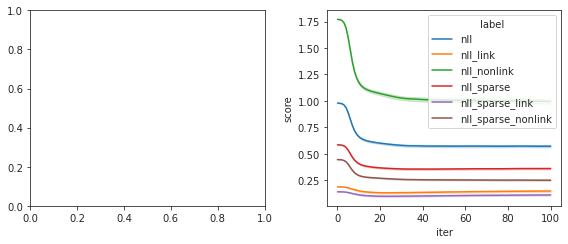

In [9]:
fig, axes = create_figure(1, 2, (8, 3.5))

# sns.histplot(df['iter'], ax=axes[0])
sns.lineplot(data=df, x='iter', y='score', hue='label', ci=95, ax=axes[1])
plt.show()

In [13]:
max_iter = 500
dlist = []
for run_name, run_dict in sv._runs[sv.perc].items():
    stuff = {k: v for k, v in run_dict['valid'].items() if 'nll' in k}
    num_iter = np.unique([len(v) for v in stuff.values()]).item()
    num_iter = min(num_iter, max_iter)
    for k, v in stuff.items():
        dlist.append({
            'key': [key] * num_iter,
            'run_name': [run_name] * num_iter,
            'score': v[-num_iter:],
            'label': [k] * num_iter,
            'iter': range(-num_iter + 1, 1),
        })
df = pd.DataFrame(merge_dicts(dlist))

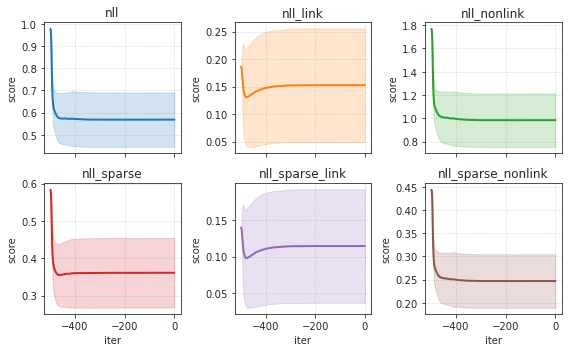

In [14]:
fig, axes = create_figure(2, 3, (8, 5), 'all')
for i, (ax, lbl) in enumerate(zip(axes.ravel(), df['label'].unique())):
    _df = df.loc[df['label'] == lbl]
    sns.lineplot(
        data=_df,
        x='iter',
        y='score',
        color=f"C{i}",
        ci='sd',
        lw=2,
        ax=ax,
    )
    ax.set_title(lbl)
    ax.grid()

In [18]:
df_avg = df.groupby(['label', 'iter']).mean().reset_index()

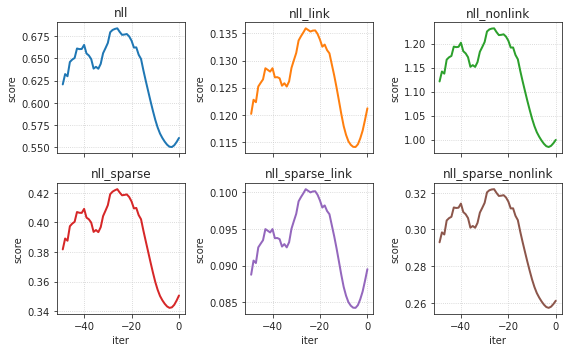

In [19]:
fig, axes = create_figure(2, 3, (8, 5), 'all')
for i, (ax, lbl) in enumerate(zip(axes.ravel(), df['label'].unique())):
    _df = df_avg.loc[df_avg['label'] == lbl]
    sns.lineplot(
        data=_df,
        x='iter',
        y='score',
        color=f"C{i}",
        lw=2,
        ax=ax,
    )
    ax.set_title(lbl)
    ax.grid()

In [20]:
_df = df_avg.loc[df_avg['iter'] == 0].drop(columns=['iter'])
results = dict(zip(_df['label'], _df['score']))
results

{
    'nll': 0.5602403718278689,
    'nll_link': 0.12118709902868853,
    'nll_nonlink': 0.9992936446434426,
    'nll_sparse': 0.350691099102459,
    'nll_sparse_link': 0.08951335270286885,
    'nll_sparse_nonlink': 0.26117774640983604
}

## Do all k and all animals

In [2]:
mice = Mice(Config(128, 3))
mice.setup_func_data('rest', runs_only=True)

In [4]:
perc = 'p25-sample'
max_iter = 50
dlist = []
for mode, proc in zip(['ca2', 'bold-lite'], [mice.ca, mice.bold]):
    for num_k in tqdm([4, 5, 6]):
        for key in tqdm(proc, leave=False):
            sv = SVINET(mice, num_k, perc, key, mode, verbose=False)
            _ = sv.load_runs()
            data = collections.defaultdict(list)
            for run_name, run_dict in sv._runs[sv.perc].items():
                if len(run_dict['community_sv']) != num_k:
                    continue
                for lbl, vals in run_dict['valid'].items():
                    if 'nll' not in lbl:
                        continue
                    num = min(max_iter, len(vals))
                    x = np_nans((1, max_iter))
                    x[0][-num:] = np.array(vals)[-num:]
                    data[lbl].append(x)
            data = {
                lbl: bn.nanmean(np.concatenate(x), 0)
                for lbl, x in data.items()
            } 
            for lbl, vals in data.items():
                dlist.append({
                    'mode': [mode] * max_iter,
                    'k': [num_k] * max_iter,
                    'key': [key] * max_iter,
                    'iter': range(-max_iter + 1, 1),
                    'label': [lbl] * max_iter,
                    'score': vals,
                })
df = pd.DataFrame(merge_dicts(dlist))
df_0 = df.loc[df['iter'] == 0].drop(columns=['iter'])

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

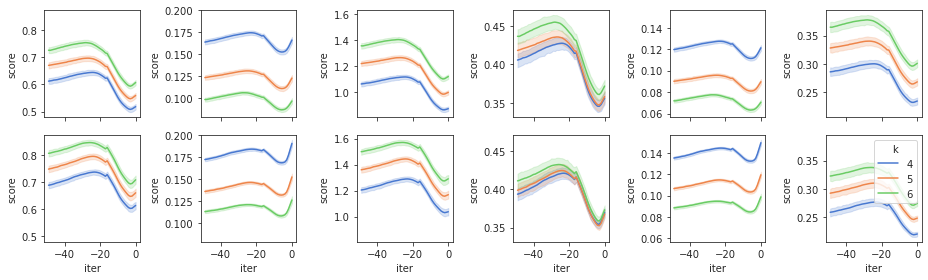

In [12]:
fig, axes = create_figure(2, 6, (13, 4), 'all', 'col')

for i, mode in enumerate(df['mode'].unique()):
    for j, lbl in enumerate(df['label'].unique()):
        _df = df.loc[
            (df['mode'] == mode) &
            (df['label'] == lbl)
        ]
        sns.lineplot(
            data=_df,
            x='iter',
            y='score',
            hue='k',
            palette='muted',
            ax=axes[i, j],
            legend=True if (i, j) == (1, 5) else False,
        )

## All CA & BOLD (512 * 3; p25)

In [2]:
mice = Mice(Config(512, 3))
mice.setup_func_data('rest', runs_only=True)

In [3]:
%%time

all_k = list(range(4, 11)) + [15, 20, 25]
perc = 'p25-sample'
max_iter = 50
dlist = []
for mode, proc in zip(['ca2', 'bold-lite'], [mice.ca, mice.bold]):
    for num_k in all_k:
        for key in proc:
            sv = SVINET(mice, num_k, perc, key, mode, verbose=False)
            _ = sv.load_runs()
            data = collections.defaultdict(list)
            for run_name, run_dict in sv._runs[sv.perc].items():
                if len(run_dict['community_sv']) != num_k:
                    continue
                for lbl, vals in run_dict['valid'].items():
                    if 'nll' not in lbl:
                        continue
                    num = min(max_iter, len(vals))
                    x = np_nans((1, max_iter))
                    x[0][-num:] = np.array(vals)[-num:]
                    data[lbl].append(x)
            data = {
                lbl: bn.nanmean(np.concatenate(x), 0)
                for lbl, x in data.items()
            } 
            for lbl, vals in data.items():
                dlist.append({
                    'mode': [mode] * max_iter,
                    'k': [num_k] * max_iter,
                    'key': [key] * max_iter,
                    'iter': range(-max_iter + 1, 1),
                    'label': [lbl] * max_iter,
                    'score': vals,
                })
df = pd.DataFrame(merge_dicts(dlist))
df_0 = df.loc[df['iter'] == 0].drop(columns=['iter'])

CPU times: user 2h 44min 59s, sys: 4min 5s, total: 2h 49min 5s
Wall time: 3h 20min 9s


In [4]:
df.shape

(675000, 6)

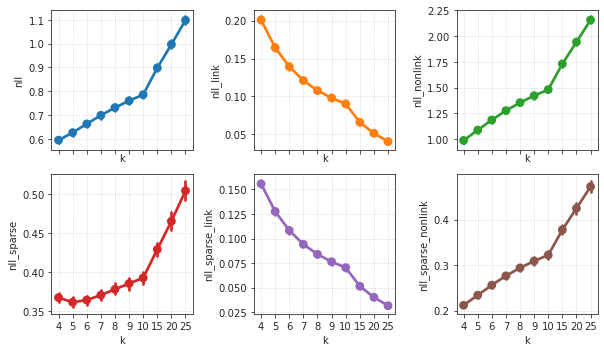

In [5]:
fig, axes = create_figure(2, 3, (8.5, 5), 'all')
for i, (ax, lbl) in enumerate(zip(axes.ravel(), df_0['label'].unique())):
    _df = df_0.loc[df_0['label'] == lbl]
    sns.pointplot(
        data=_df,
        x='k',
        y='score',
        color=f"C{i}",
        lw=3,
        ax=ax,
    )
    ax.set_ylabel(lbl)
    ax.grid()

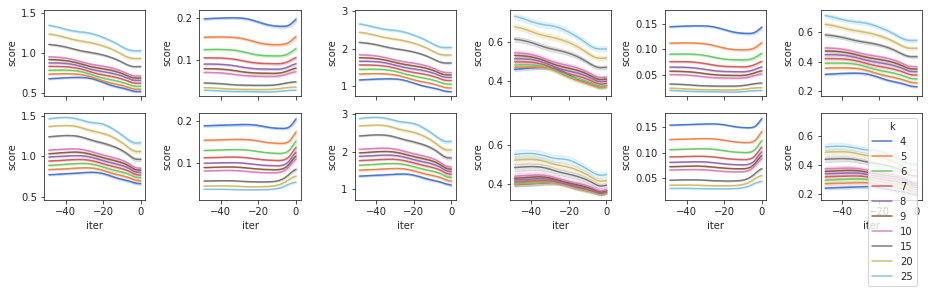

In [6]:
fig, axes = create_figure(2, 6, (13, 4), 'all', 'col')

for i, mode in enumerate(df['mode'].unique()):
    for j, lbl in enumerate(df['label'].unique()):
        _df = df.loc[
            (df['mode'] == mode) &
            (df['label'] == lbl)
        ]
        sns.lineplot(
            data=_df,
            x='iter',
            y='score',
            hue='k',
            palette='muted',
            ax=axes[i, j],
            legend=True if (i, j) == (1, 5) else False,
        )